## Part1: Inverse Discrete Transform 

In [100]:
using Printf
using Statistics
using Random
using Pkg
using Distributions
using Plots

In [101]:
Random.seed!(69)

TaskLocalRNG()

In [102]:
n_samples=10000
lambda=3

3

In [103]:
#Generate a Uniform Distribution with 10,000 samples.
dist=Uniform()
samples=rand(dist,n_samples)
x=1:n_samples

1:10000

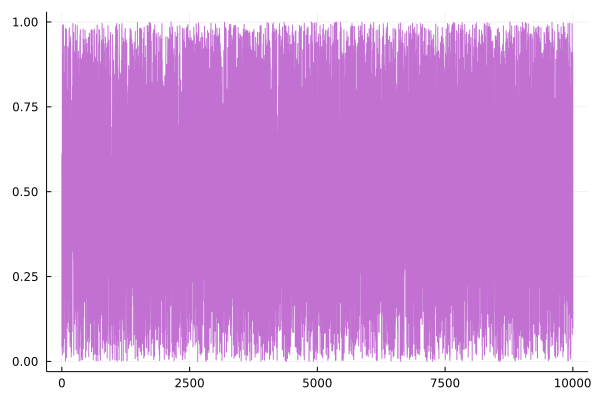

In [104]:
#This plot shows the randomness of the sample generated
plot(x,samples,color=4, label="")

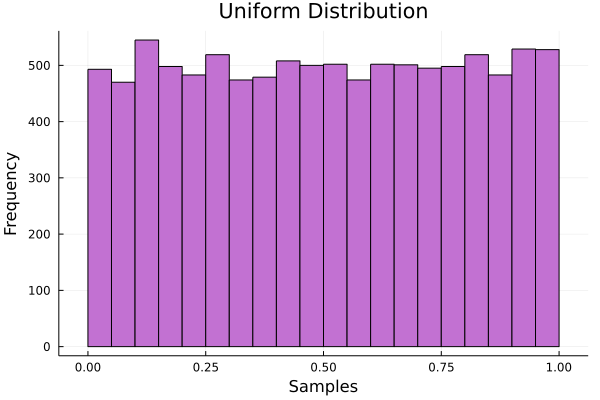

In [113]:
#The histogram shows that the samples are uniformly distributed between 0 and 1.
histogram(samples, color=4,title="Uniform Distribution",label="", xlabel="Samples", ylabel="Frequency")

In [106]:
flag=zeros(n_samples,1) #The flag array will tell us which samples have been chosen and hence when to end the loop 
poisson_dist=zeros(n_samples,1)
i=0
p=0

0

In [107]:
while sum(flag)<n_samples
    q=((exp(-lambda)*(lambda)^i)/factorial(i)) 
    vals1=(samples .<= (p+q)) 
    vals2=(samples .< p)
    #vals=vals1[vals2]
    global p=p+q
    #println(vals)
    flag[vals1].+=1 #Change flag to 1 for samples that have been drawn
    flag[vals2].-=1 #These samples were drawn twice hence 1 needs to be subtracted
    poisson_dist[vals1].+=i #Assign i to those samples lying between p and p+q
    poisson_dist[vals2].-=i
    global i = i+1
end    

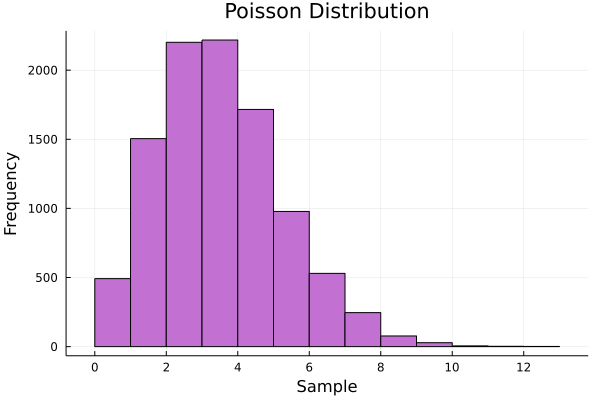

In [116]:
histogram(poisson_dist, title="Poisson Distribution", bins=20,color=4,xlabel="Sample",ylabel="Frequency",label="")

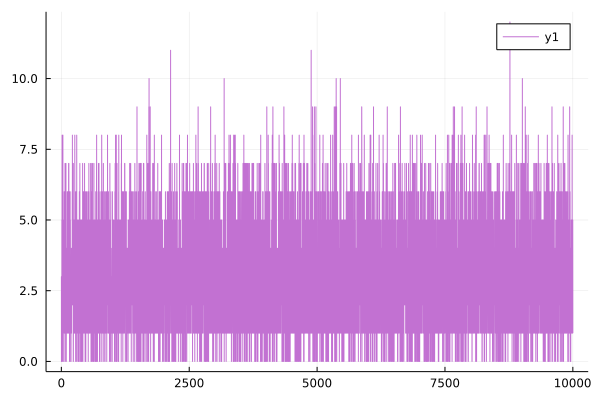

In [109]:
plot(x,poisson_dist,color=4,label="")

In [110]:
mean(poisson_dist)

3.0171

In [111]:
var(poisson_dist)

3.0371113011301065

## Part 2: Accept-Reject Technique

In [117]:
#parameters for the binomial distribution.
n=20
p=0.25

0.25

In [118]:
#Function to find the maximum c
all_c=zeros(n,1)
Proposal=Poisson(lambda)
Actual=Binomial(n,p)
for i in 1:n
    all_c[i]=pdf(Actual,i)/pdf(Proposal,i)
end   
c=findmax(all_c)[1]
c=c+0.001

13.609262988632162

In [119]:
binomial_dist=zeros(n_samples,1) #Array that will store accepted proposals
for j in 1:n_samples #Loop to generate n_samples number of accepted proposals
    accept=0
    while accept==0
        U=rand(dist,1)
        id=rand(1:n_samples) #Generate a random id to pick a sample from the poisson distribution
        prop=poisson_dist[id]
        prop=Int(prop)
        r=pdf(Actual,prop)/(c*pdf(Proposal,prop)) #This is Pj/c*Qj
        if U[1]<r 
            accept=1
            binomial_dist[j]=prop
        end
    end 
end 

In [120]:
#Mean of binomial distribution = n*p = 20*0.25 = 5
#Variance of binomial distribution = n*p*(1-p) = 20*0.25*0.75= 3.75

println("Mean of the distribution is: ", string(mean(binomial_dist)))
println("Variance of the distribution is: ", string(var(binomial_dist)))

Mean of the distribution is: 5.0422
Variance of the distribution is: 3.655584718471846


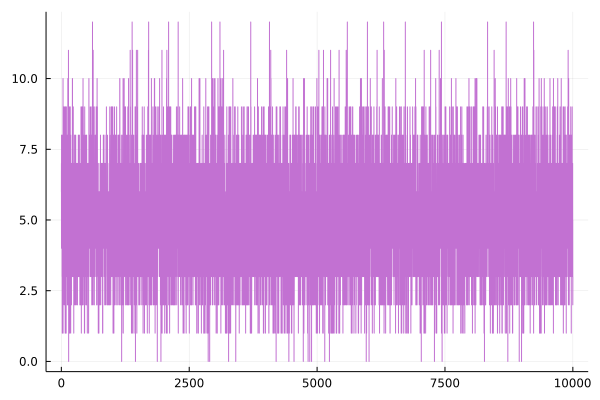

In [121]:
plot(binomial_dist, color=4,label="")

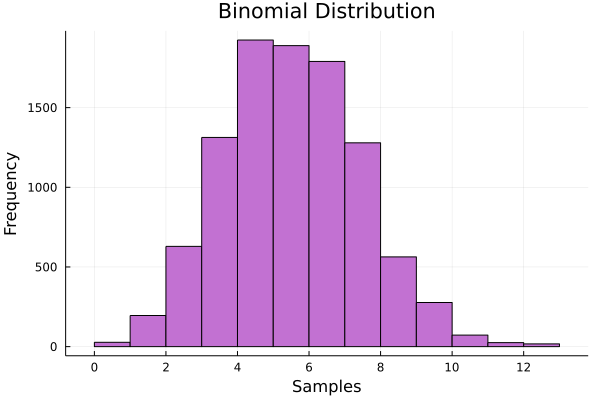

In [123]:
histogram(binomial_dist,bins=20, color=4,label="", xlabel="Samples", ylabel="Frequency",title="Binomial Distribution")